In [382]:
#Importing the libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs

In [383]:
phone_reviews = []

In [426]:
#Scapping the reviews of Redmi Phone from amazon using Beautiful Soup & requests
for i in range(1,95):
  op = []
  url = "https://www.amazon.in/Redmi-Jade-Black-4GB-128GB/product-reviews/B0C9JDHZTB/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content, 'html.parser')
  reviews = soup.findAll('span', attrs={'class', 'a-size-base review-text review-text-content'})
  for i in range(len(reviews)):
    op.append(reviews[i].text)
  phone_reviews = phone_reviews+op

In [427]:
phone_reviews

["\nI am enjoying 5g access for first time.This device is entry level by amazon and redmi collabration.I bought this for less than 8k with my old redmi 9a  exchange offer.Phone specs  for 4gb ram - I have good OTT apps and screen is good.Usage of 1.7Gb ram by OS is too much though.I hope upcoming updates fix this.Lock screen is finger print -Its good upgrade for me.Experience using other launcher and keypads - I use nova launcher and microsoft swift keypad- gesture control is blocked when you opt for third party launchers - keyboard looks perfect with big screen.There is 3 button at bottom which you cant remove.Bloatware is plenty - I didn't sign in google account immediately - I uninstall most apps.I feel battery drain with my 5g usage ,But yeah great  hotspot for my laptop or tablet.Gaming :Not much into gaming - I play crosswords , spelling games- hardly any issue when playing . This phone is not for graphic intensive games. But Okay for subway surfer , temple run games kind of game

In [429]:
#Saving the file into a text file with phone reviews
with open('phone_reviews.txt', 'w', encoding ='utf-8') as output:
  output.write(str(phone_reviews))

In [430]:
type(phone_reviews)

list

In [431]:
#joining the phone_reviews
text = ' '.join(phone_reviews)
text[0:100]

'\nI am enjoying 5g access for first time.This device is entry level by amazon and redmi collabration.'

In [432]:
#removing special characters and symbols
text = re.sub('[^A-Za-z' ']+', ' ', text).lower()
text = re.sub('[0-9' ']+', ' ', text)
text[0:100]

' i am enjoying g access for first time this device is entry level by amazon and redmi collabration i'

In [433]:
#tokenizing the words
token = text.split(' ')
token[0:20]

['',
 'i',
 'am',
 'enjoying',
 'g',
 'access',
 'for',
 'first',
 'time',
 'this',
 'device',
 'is',
 'entry',
 'level',
 'by',
 'amazon',
 'and',
 'redmi',
 'collabration',
 'i']

In [434]:
#removing the extra spaces
proper_text = [s.strip() for s in token]
proper_text = [s for s in token if s]
proper_text[0:20]

['i',
 'am',
 'enjoying',
 'g',
 'access',
 'for',
 'first',
 'time',
 'this',
 'device',
 'is',
 'entry',
 'level',
 'by',
 'amazon',
 'and',
 'redmi',
 'collabration',
 'i',
 'bought']

In [435]:
#downloading the stopwords and the nltk tool-kit
nltk.download('stopwords', 'punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to punkt...
[nltk_data]   Package stopwords is already up-to-date!


In [436]:
#removing the stop words
no_stop_tokens = [a for a in proper_text if not a in stop_words]
no_stop_tokens[0:20]

['enjoying',
 'g',
 'access',
 'first',
 'time',
 'device',
 'entry',
 'level',
 'amazon',
 'redmi',
 'collabration',
 'bought',
 'less',
 'k',
 'old',
 'redmi',
 'exchange',
 'offer',
 'phone',
 'specs']

In [437]:
no_stop_tokens

['enjoying',
 'g',
 'access',
 'first',
 'time',
 'device',
 'entry',
 'level',
 'amazon',
 'redmi',
 'collabration',
 'bought',
 'less',
 'k',
 'old',
 'redmi',
 'exchange',
 'offer',
 'phone',
 'specs',
 'gb',
 'ram',
 'good',
 'ott',
 'apps',
 'screen',
 'good',
 'usage',
 'gb',
 'ram',
 'os',
 'much',
 'though',
 'hope',
 'upcoming',
 'updates',
 'fix',
 'lock',
 'screen',
 'finger',
 'print',
 'good',
 'upgrade',
 'experience',
 'using',
 'launcher',
 'keypads',
 'use',
 'nova',
 'launcher',
 'microsoft',
 'swift',
 'keypad',
 'gesture',
 'control',
 'blocked',
 'opt',
 'third',
 'party',
 'launchers',
 'keyboard',
 'looks',
 'perfect',
 'big',
 'screen',
 'button',
 'bottom',
 'cant',
 'remove',
 'bloatware',
 'plenty',
 'sign',
 'google',
 'account',
 'immediately',
 'uninstall',
 'apps',
 'feel',
 'battery',
 'drain',
 'g',
 'usage',
 'yeah',
 'great',
 'hotspot',
 'laptop',
 'tablet',
 'gaming',
 'much',
 'gaming',
 'play',
 'crosswords',
 'spelling',
 'games',
 'hardly',
 'is

In [438]:
#Removing words that have less than 3 letters
improved_text = [e for e in no_stop_tokens if len(e) >3]
improved_text[0:15]

['enjoying',
 'access',
 'first',
 'time',
 'device',
 'entry',
 'level',
 'amazon',
 'redmi',
 'collabration',
 'bought',
 'less',
 'redmi',
 'exchange',
 'offer']

In [439]:
#Joining the text into a single string in order to plot a wordcloud
no_stop_words = ' '.join(improved_text)
no_stop_words

'enjoying access first time device entry level amazon redmi collabration bought less redmi exchange offer phone specs good apps screen good usage much though hope upcoming updates lock screen finger print good upgrade experience using launcher keypads nova launcher microsoft swift keypad gesture control blocked third party launchers keyboard looks perfect screen button bottom cant remove bloatware plenty sign google account immediately uninstall apps feel battery drain usage yeah great hotspot laptop tablet gaming much gaming play crosswords spelling games hardly issue playing phone graphic intensive games okay subway surfer temple games kind games issues waiting updates landscape screen crashing also google play load sometimes need reset clear cache charging takes nearly charging twice speaker felt weird days adapted issues taking call speaker mode final verdict looking basic phone processor needs fixes though know signing like quite phone terms hardware excellent phone price memory s

In [440]:
#Creating a user function to plot a wordcloud
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

In [441]:
#setting the parameters for the wordcloud
wordcloud_ip = WordCloud(
    background_color='black', height =2000, width=3000, max_words = 50,
    colormap="Set2", stopwords = stop_words).generate(no_stop_words)

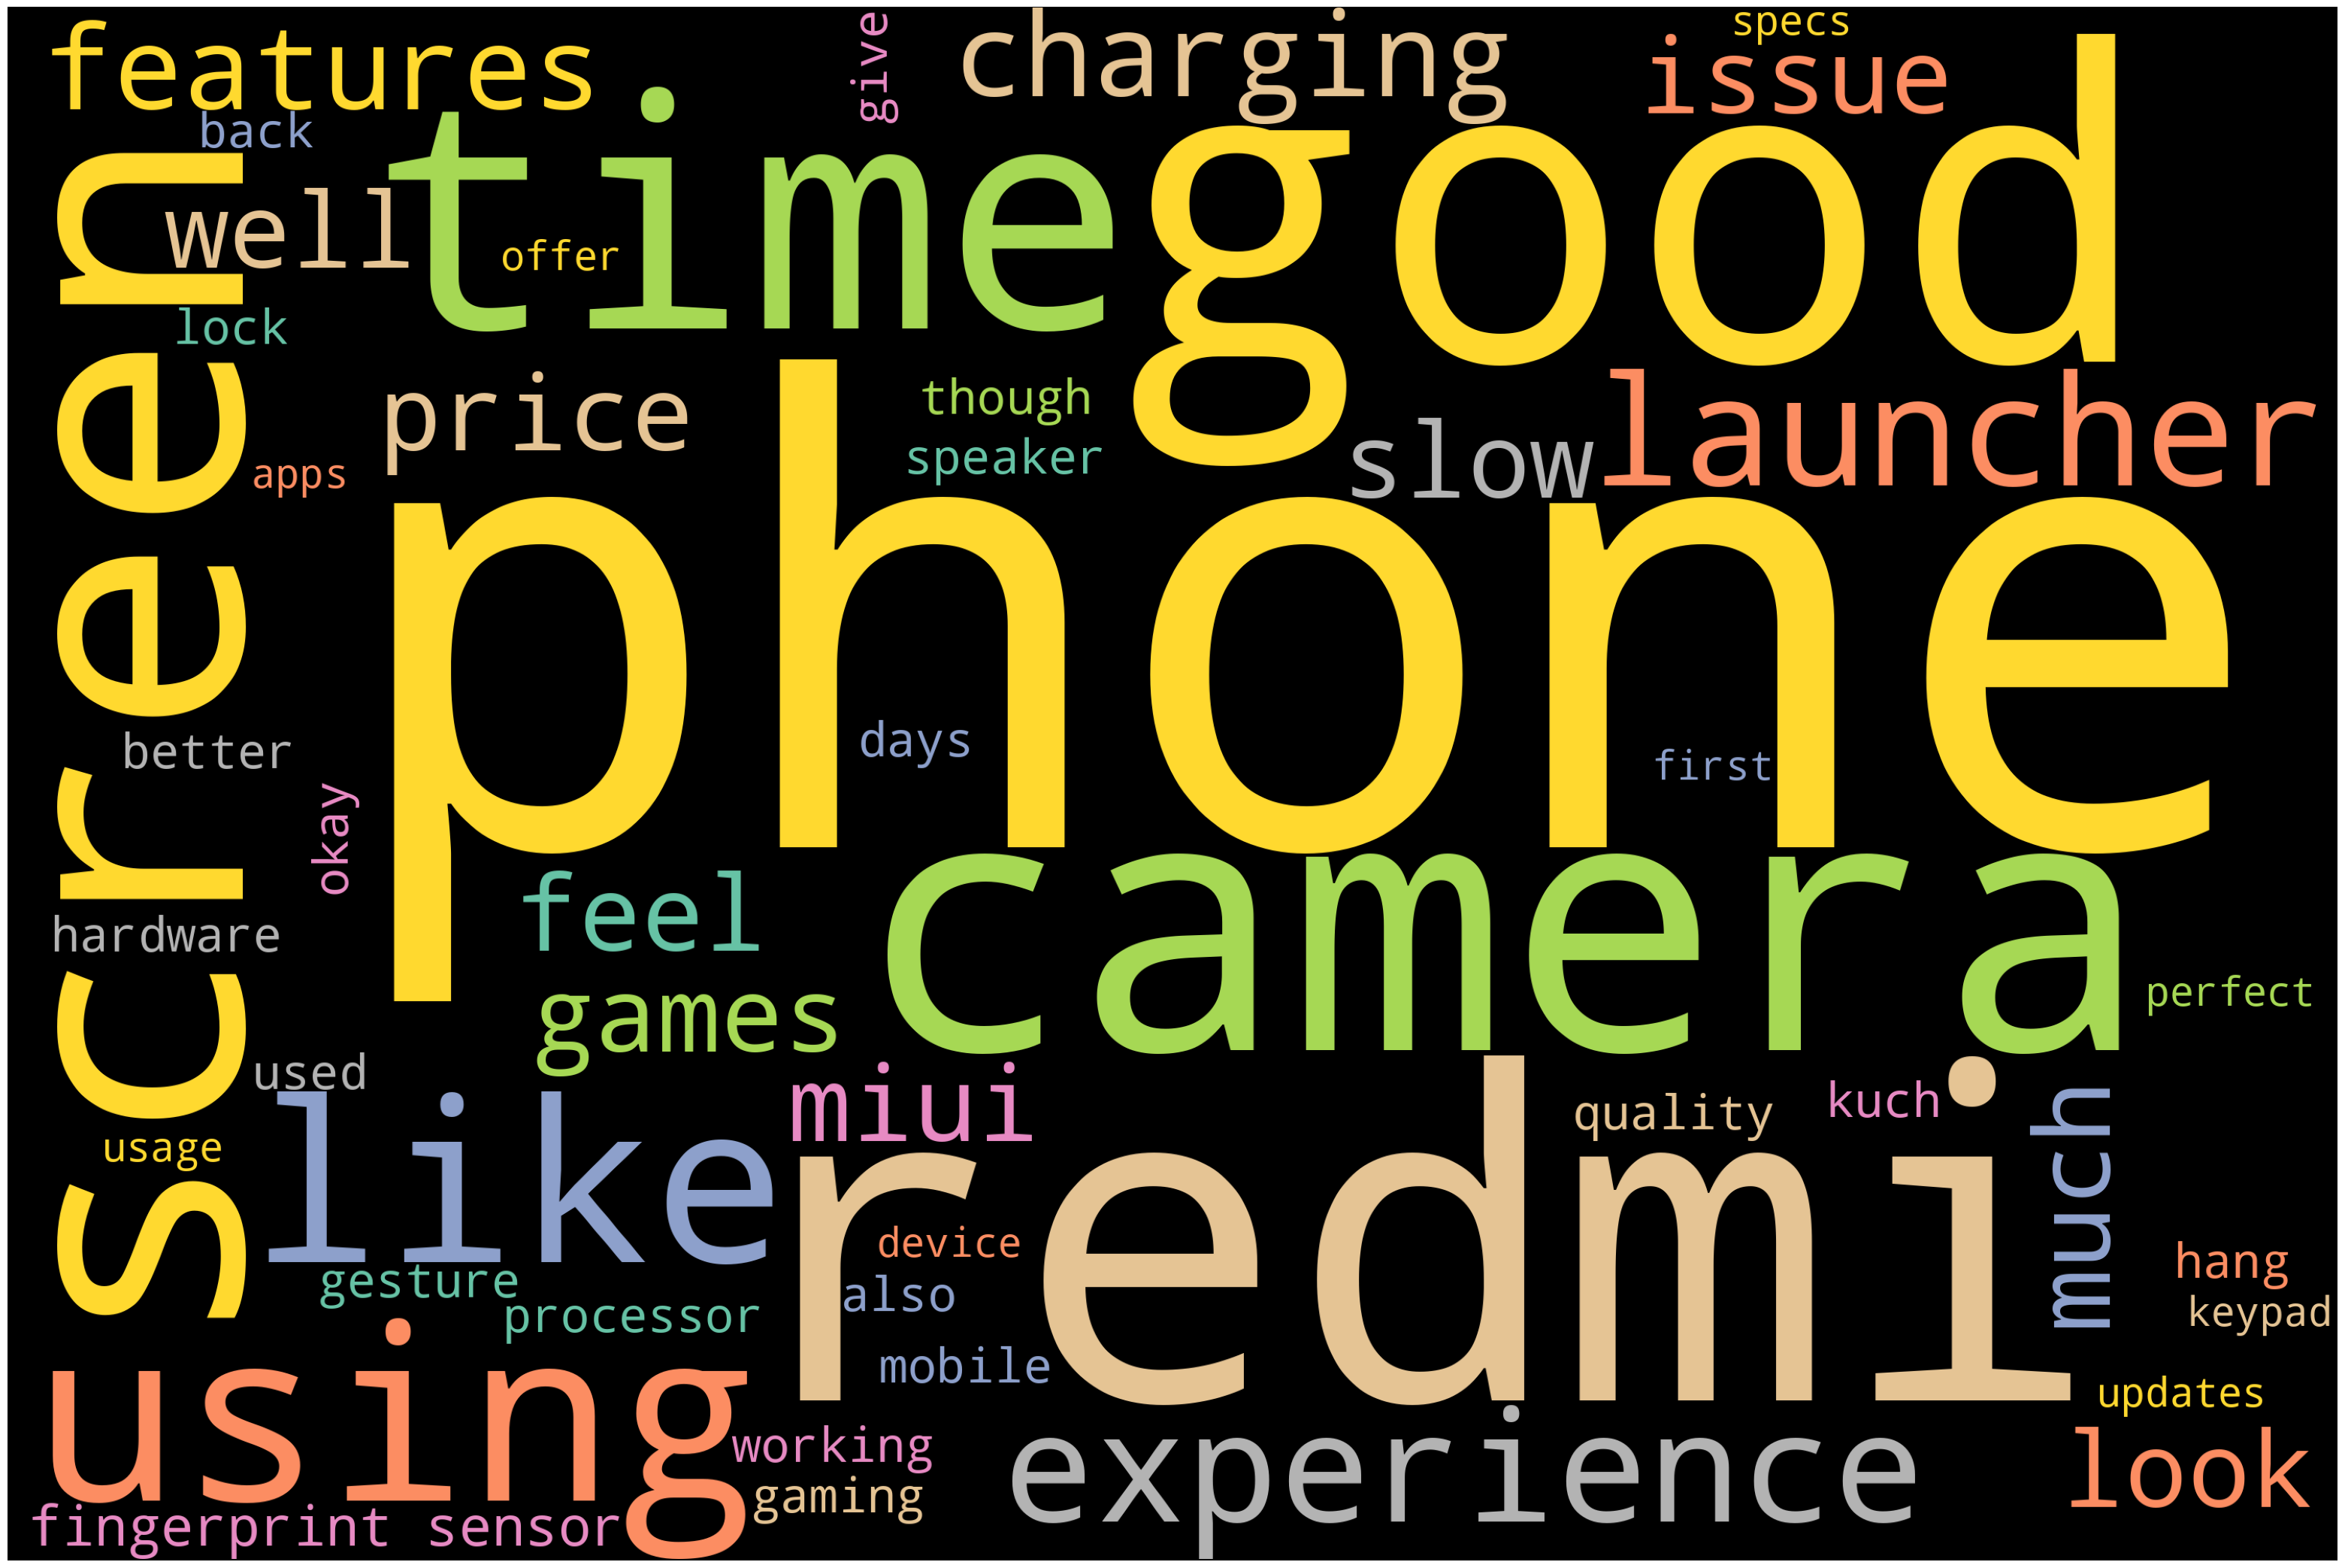

In [442]:
#plotting the wordcloud
plot_cloud(wordcloud_ip)

#Sentiment Analysis using text files provided with postive, negative and stopwords

In [443]:
#Reading the stopwords text file
with open('stop.txt', 'r', errors='ignore') as file:
  content = file.read()
Stop = content.split()

In [444]:
#Reading the negative words text file
with open("negative-words.txt", 'r', errors='ignore') as Neg:
  content = Neg.read()
neg_words = content.find('2-faced')
negative_words = content[neg_words:].split()

In [445]:
#Reading the positive words text file
with open('positive-words.txt', 'r', errors ='ignore') as Pos:
  content = Pos.read()
pos_words = content.find('a+')
positive_words = content[pos_words:].split()

In [446]:
Stop[0:20]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along']

In [447]:
negative_words[0:20]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd']

In [448]:
positive_words[0:20]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately']

In [449]:
#Creating a dataframe for the phone reviews
review_df = pd.DataFrame(phone_reviews, columns = ['Sentences'])
review_df

,Sentences
0,\nI am enjoying 5g access for first time.This ...
1,\nI like quite a lot about this phone. In term...
2,\nThough I dont use Camera must..I have used a...
3,"\nI recently purchased a new phone, and I must..."
4,\nNo doubt phone is good look wise..But kuch p...
5,\nI like it's appearance very nice. 5g in low ...
6,\nI'm writing this review after using it for a...
7,\nDisplay brightness is at lower side. Fingerp...
8,\nThis phone is an budget master phone. It giv...
9,"\nFirst I love this Jade Black 🖤 Colour, The R..."


In [450]:
#Converting the sentences to lower case
review_df = review_df.applymap(lambda s: s.lower() if type(s) ==str else s)
review_df

,Sentences
0,\ni am enjoying 5g access for first time.this ...
1,\ni like quite a lot about this phone. in term...
2,\nthough i dont use camera must..i have used a...
3,"\ni recently purchased a new phone, and i must..."
4,\nno doubt phone is good look wise..but kuch p...
5,\ni like it's appearance very nice. 5g in low ...
6,\ni'm writing this review after using it for a...
7,\ndisplay brightness is at lower side. fingerp...
8,\nthis phone is an budget master phone. it giv...
9,"\nfirst i love this jade black 🖤 colour, the r..."


In [451]:
#Removing the \n from each sentence
review_df['Sentences'] = review_df['Sentences'].str.replace('\n','')
review_df

,Sentences
0,i am enjoying 5g access for first time.this de...
1,i like quite a lot about this phone. in terms ...
2,though i dont use camera must..i have used amm...
3,"i recently purchased a new phone, and i must s..."
4,no doubt phone is good look wise..but kuch plu...
5,i like it's appearance very nice. 5g in low bu...
6,i'm writing this review after using it for a w...
7,display brightness is at lower side. fingerpri...
8,this phone is an budget master phone. it gives...
9,"first i love this jade black 🖤 colour, the red..."


In [452]:
#Removing the punctuations
review_df['Sentences'] = review_df['Sentences'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
review_df

,Sentences
0,i am enjoying 5g access for first timethis dev...
1,i like quite a lot about this phone in terms o...
2,though i dont use camera musti have used amm r...
3,i recently purchased a new phone and i must sa...
4,no doubt phone is good look wisebut kuch plus ...
5,i like its appearance very nice 5g in low budg...
6,im writing this review after using it for a we...
7,display brightness is at lower side fingerprin...
8,this phone is an budget master phone it gives ...
9,first i love this jade black 🖤 colour the redm...


In [453]:
#Creating a user function that calculates the sentiment score
def sentiment_score(text):
  words = text.split()
  sent_score = 0
  for word in words:
    if word in Stop:
      continue
    elif word in positive_words:
      sent_score +=1
    elif word in negative_words:
      sent_score -=1
  return sent_score

In [454]:
#testing the user function
sentiment_score('happy')

1

In [455]:
#Applying the sentiment score user function on the entire dataframe
review_df['Sentiment_Score'] = review_df['Sentences'].apply(sentiment_score)
review_df

,Sentences,Sentiment_Score
0,i am enjoying 5g access for first timethis dev...,0
1,i like quite a lot about this phone in terms o...,0
2,though i dont use camera musti have used amm r...,-3
3,i recently purchased a new phone and i must sa...,5
4,no doubt phone is good look wisebut kuch plus ...,0
5,i like its appearance very nice 5g in low budg...,-1
6,im writing this review after using it for a we...,1
7,display brightness is at lower side fingerprin...,2
8,this phone is an budget master phone it gives ...,0
9,first i love this jade black 🖤 colour the redm...,3


In [456]:
#Sentiment Score for the whole review by using the Positive and Negative Words provided.
review_df['Sentiment_Score'].sum()

14

#Sentiment Analysis Using Afinn Database

In [457]:
#Reading the afinn database
afinn = pd.read_csv('Afinn.csv', encoding = 'latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [458]:
#Converting the scores to a dictionary
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [459]:
!python -m spacy download en

2023-10-27 15:37:38.389814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 15:37:38.389883: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 15:37:38.389923: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 15:37:39.687401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6

In [460]:
#Making a user function to calculate affinity score for each word in a sentence
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def affinity_score(text:str = None):
  sent_score =0
  if text:
    sentence = nlp(text)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [461]:
#Testing the function
word = 'good'
affinity_score(word)

3

In [462]:
#Applying the sentiment score function to all the sentence
review_df['afinn_sent_score'] = review_df['Sentences'].apply(affinity_score)
review_df

,Sentences,Sentiment_Score,afinn_sent_score
0,i am enjoying 5g access for first timethis dev...,0,17
1,i like quite a lot about this phone in terms o...,0,7
2,though i dont use camera musti have used amm r...,-3,-8
3,i recently purchased a new phone and i must sa...,5,13
4,no doubt phone is good look wisebut kuch plus ...,0,3
5,i like its appearance very nice 5g in low budg...,-1,1
6,im writing this review after using it for a we...,1,7
7,display brightness is at lower side fingerprin...,2,4
8,this phone is an budget master phone it gives ...,0,8
9,first i love this jade black 🖤 colour the redm...,3,11


In [463]:
#Sentiment Score for the whole review
review_df['afinn_sent_score'].sum()

126

In [464]:
#Adding Word Count for each sentence in the dataframe
review_df['word_count'] = review_df['Sentences'].str.split().apply(len)
review_df

,Sentences,Sentiment_Score,afinn_sent_score,word_count
0,i am enjoying 5g access for first timethis dev...,0,17,248
1,i like quite a lot about this phone in terms o...,0,7,210
2,though i dont use camera musti have used amm r...,-3,-8,67
3,i recently purchased a new phone and i must sa...,5,13,132
4,no doubt phone is good look wisebut kuch plus ...,0,3,90
5,i like its appearance very nice 5g in low budg...,-1,1,51
6,im writing this review after using it for a we...,1,7,44
7,display brightness is at lower side fingerprin...,2,4,62
8,this phone is an budget master phone it gives ...,0,8,85
9,first i love this jade black 🖤 colour the redm...,3,11,55


<Axes: xlabel='afinn_sent_score', ylabel='Density'>

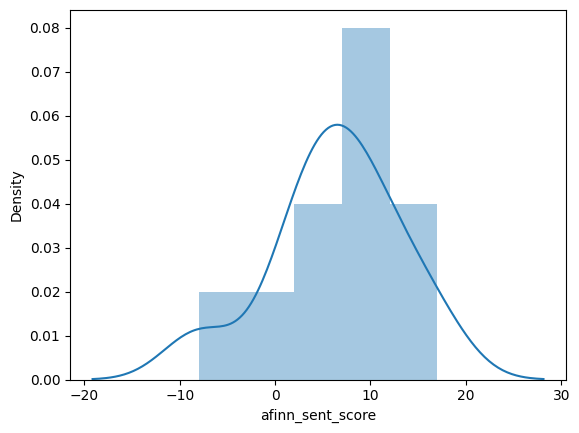

In [465]:
#Distribution plot of the Afinn Sent Score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.distplot(review_df['afinn_sent_score'])

<Axes: ylabel='afinn_sent_score'>

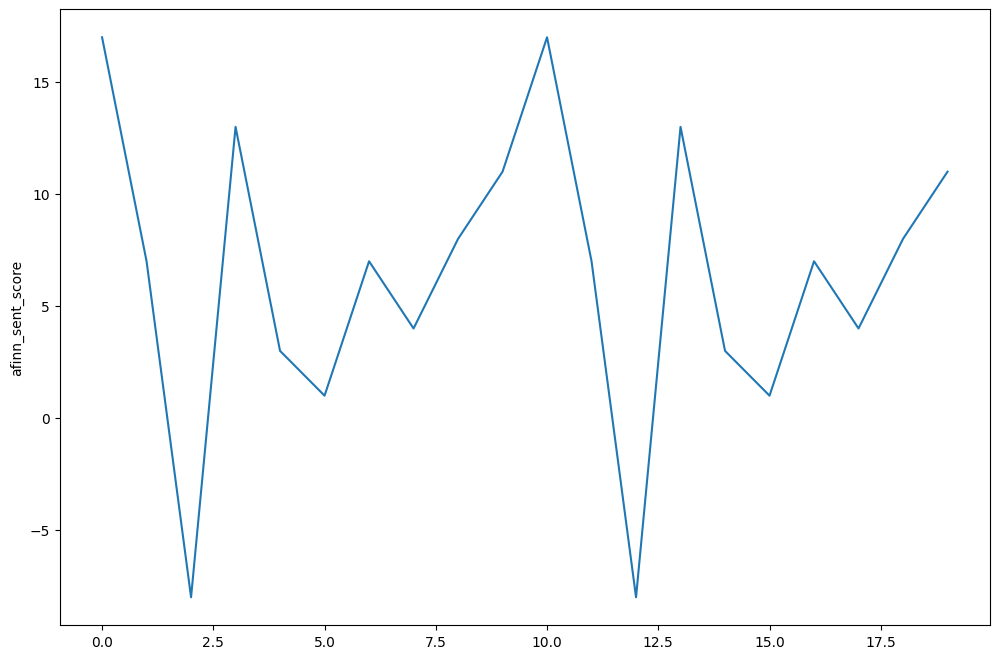

In [466]:
#Line plot of the Afinn Sentiment Score
plt.figure(figsize=(12,8))
sns.lineplot(y='afinn_sent_score', x=range(0,len(review_df)), data=review_df)

<Axes: title={'center': 'Sentence Sentiment Value VS sentence word count'}, xlabel='word_count', ylabel='afinn_sent_score'>

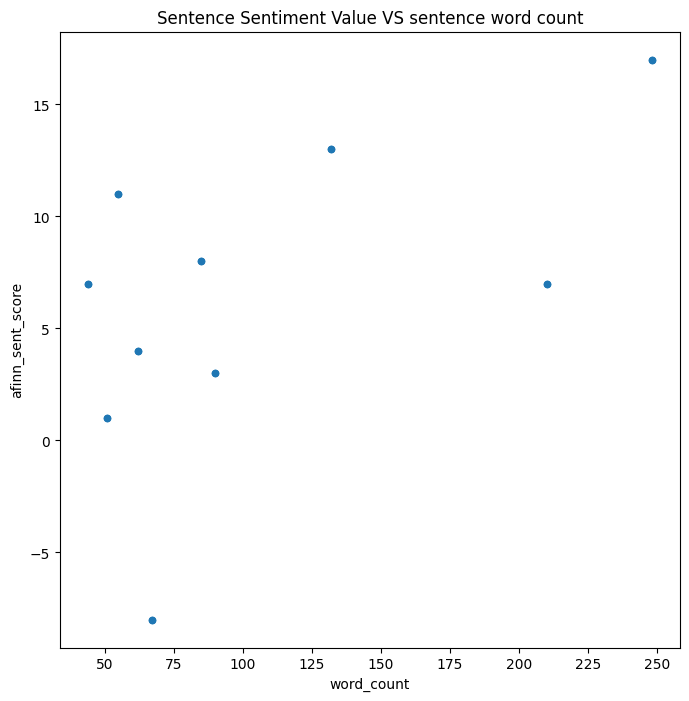

In [467]:
#Scatter plot between word count and Setiment Score using Afinn Database
review_df.plot.scatter(x ='word_count', y ='afinn_sent_score', figsize =(8,8), title = "Sentence Sentiment Value VS sentence word count")